# Trabajo Integrador

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

## 1. Selección del dataset
Elegimos el **dataset 1**, que contiene datos sobre distintas estaciones meteorológicas de Australia.

In [2]:
# Seteo esta opcion en True para evitar que me exprese los valores numericos con notacion cientifica
np.set_printoptions(suppress=True)

In [3]:
australian_weather_data = pd.read_csv('./data/weatherAUS.csv',encoding='utf-8',sep=',',skipinitialspace=True)

In [4]:
australian_weather_data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## 2. Análisis exploratorio inicial

- Visualizar las primeras filas.
- Realizar un resumen de 5 números.
- Identificar los tipos de datos: categórico, ordinal, etc. Responder para cada variable su tipo y si es informativa para un problema de clasificación (por ejemplo si se trata de un código, como una matrícula, o un nombre propio).
- Identificar las variables de entrada y de salida del problema.
- Variables de entrada:
    - Realizar los siguientes análisis por tipo de variable:
        - Numéricas: Obtener conclusiones acerca de la distribución de los datos.
        - Categóricas: Obtener conclusiones acerca de la cardinalidad, representación de cada categoría, etc.
        - Compuestas: ¿Pueden tratarse para utilizarse en el problema a resolver?
- Variables de salida (en caso de aplicar):
    - ¿Están balanceadas las clases?
    - (en caso de aplicar) ¿Qué técnicas consideraría para codificar la variable de salida? Justifique.

**Visualizamos las primeras filas**

In [5]:
australian_weather_data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Identificamos los tipos de datos**

In [6]:
australian_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

| Variable | Descripción | Tipo | Es informativa | Entrada / Salida | 
| -------- | ---------- | ---- | -------------- | ---------------- |
| Date     | Fecha de la medición | Fecha/Hora | Si | Entrada |
| Location | Ubicación geográfica | Categorica Nominal | Si | Entrada |
| MinTemp | Temperatura mínima registrada (celsius) | Numérica Continua | Si | Entrada |
| MaxTemp | Temperatura máxima registrada (celsius) |Numérica Continua | Si | Entrada |
| Rainfall | Precipitaciones registradas (mm) | Numérica Continua | Si | Entrada |
| Evaporation | Evaporación registrada (mm) | Numérica Continua | Si | Entrada |
| Sunshine | Cantidad de horas de sol | Numérica Continua | Si | Entrada |
| WindGustDir | Dirección del viento más fuerte registrado durante el día | Categórica Nominal | Si | Entrada |
| WindGustSpeed | Velocidad del viento más fuerte registrada durante el día (km/h) | Numérica continua | Si | Entrada |
| WindDir9am | Dirección del viento registrada a las 9 am | Categórica Nominal | Si | Entrada |
| WindDir3pm | Dirección del viento registrada a las 3 pm | Categórica Nominal | Si | Entrada |
| WindSpeed9am | Velocidad del viento registrada a las 9 am (km/h) | Numérica continua | Si | Entrada |
| WindSpeed3pm | Velocidad del viento registrada a las 3 pm (km/h) | Numérica continua | Si | Entrada |
| Humidity9am | Humedad registrada a las 9 am (%) | Numérica continua | Si | Entrada |
| Humidity3pm | Humedad registrada a las 3 pm (%) | Numérica continua | Si | Entrada |
| Pressure9am | Presión atmosférica registrada a las 9 am (hpa) | Numérica continua | Si | Entrada |
| Pressure3pm | Presión atmosférica registrada a las 3 pm (hpa) | Numérica continua | Si | Entrada |
| Cloud9am | Fracción del cielo oscurecido por las nubesa las 9 am | Numérica continua | Si | Entrada |
| Cloud3pm | Fracción del cielo oscurecido por las nubesa las 3 pm | Numérica continua | Si | Entrada |
| Temp9am | Temperatura registrada a las 9 am (celsius) | Numérica continua | Si | Entrada |
| Temp3pm | Temperatura registrada a las 3 pm (celsius) | Numérica continua | Si | Entrada |
| RainToday | Flag que indica si llovio durante el día (Yes/No) | Categorica Nominal | Si | Entrada |
| RainTomorrow | Flag que indica si lloverá al día siguiente (Yes/No) | Categórica Nominal | - | Salida |

**Analicemos las features numéricas**

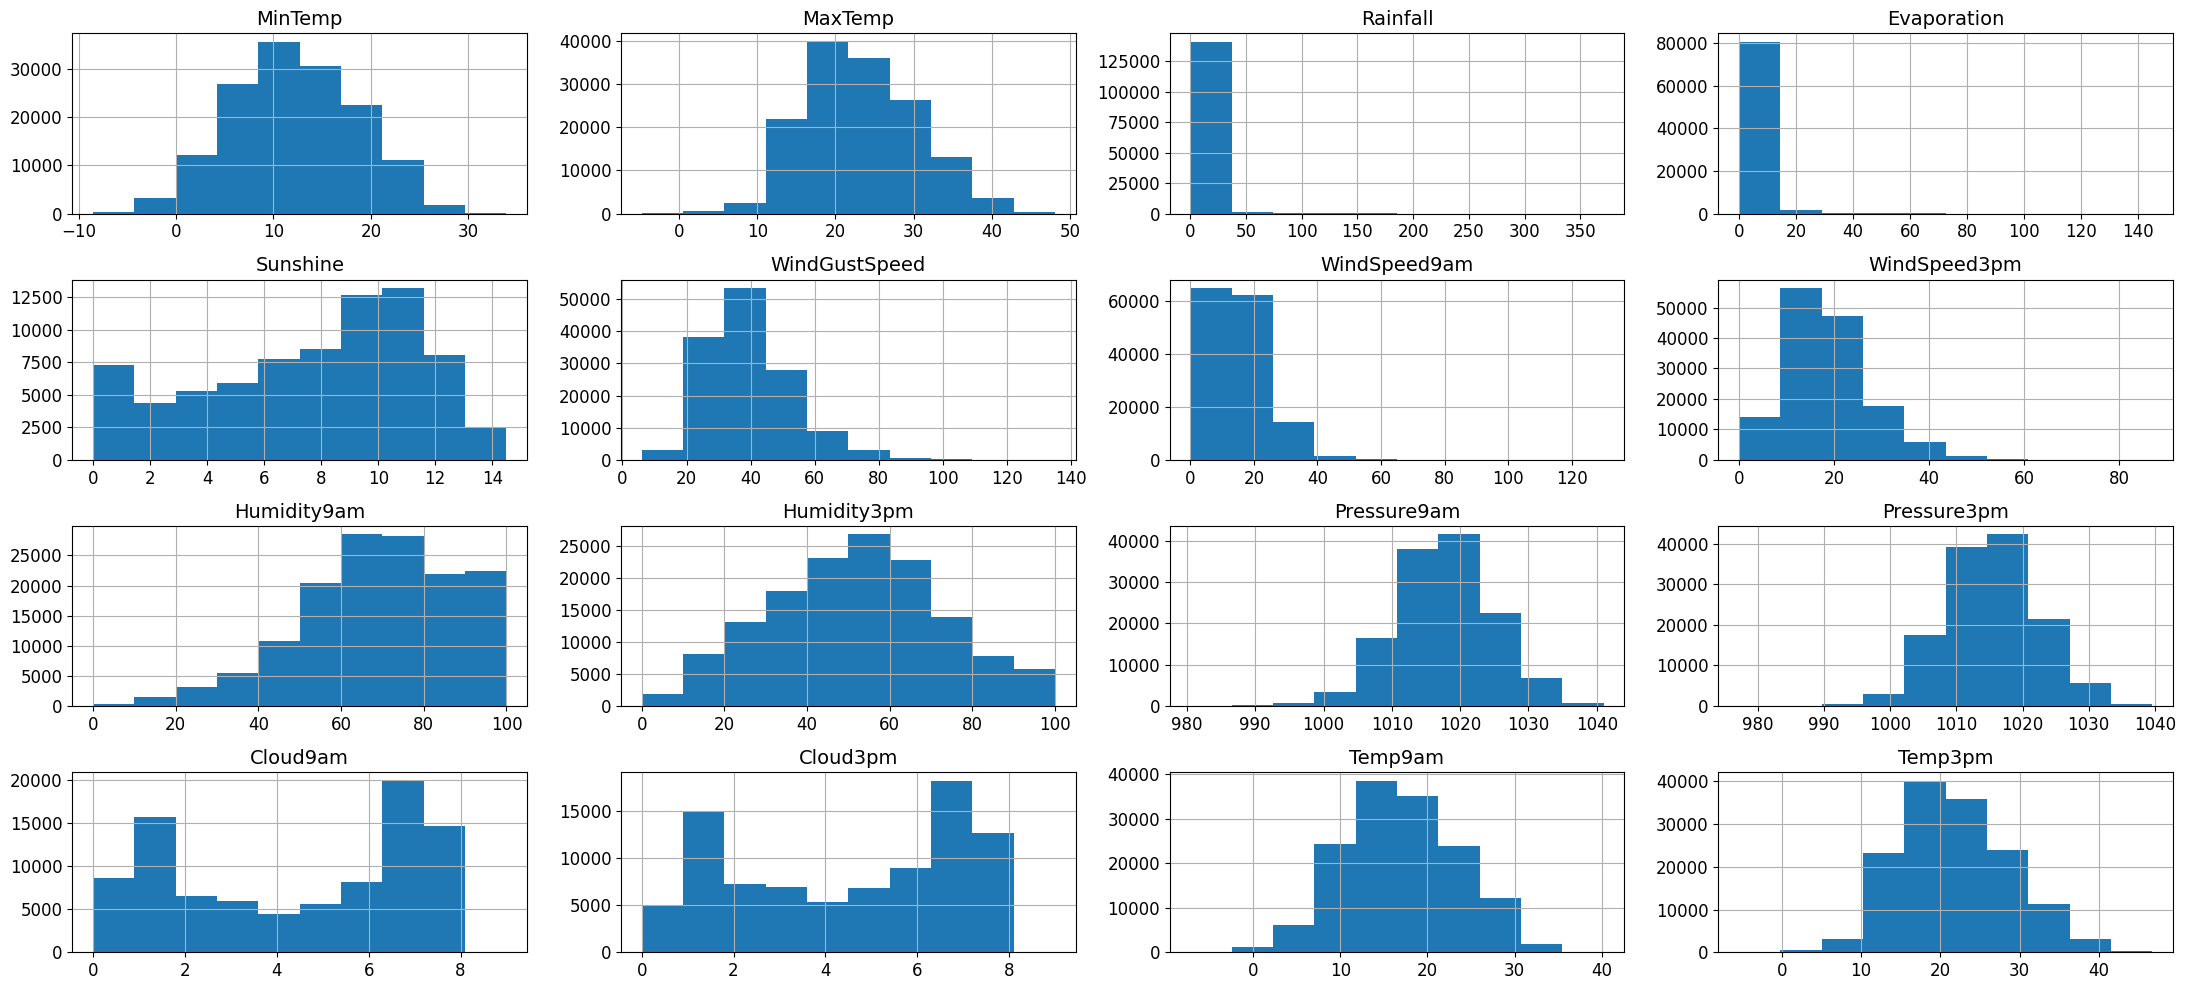

In [7]:
fig = australian_weather_data.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10))
[x.title.set_size(14) for x in fig.ravel()]
plt.tight_layout()
plt.show()

Viendo el histograma de las features numéricas, podemos inferir que:
- Las features **(Rainfall, Evaporation, Cloud9am, Cloud3pm)** tienen una distribución que **no** es normal.
- Las features restantes tienen una distribución normal pero no simétrica, con diferentes oblicuidades o skewness.

Proponemos entonces:
- Aplicar transformaciones a las features para normalizarlas.
- Estandarizarlas para escalarlas y que aquellas de mayor magnitud no dominen a las de menor magnitud.

**Analicemos las features categóricas**

In [16]:
australian_weather_data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [9]:
australian_weather_data.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [10]:
australian_weather_data.WindDir9am.unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [11]:
australian_weather_data.WindDir3pm.unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [12]:
australian_weather_data.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

Veamos la cardinalidad

In [13]:
# Resumimos
cat_features = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in cat_features:
    print('Feature: ', col, ', Number of categories: ', australian_weather_data[col].nunique())

Feature:  Location , Number of categories:  49
Feature:  WindGustDir , Number of categories:  16
Feature:  WindDir9am , Number of categories:  16
Feature:  WindDir3pm , Number of categories:  16
Feature:  RainToday , Number of categories:  2


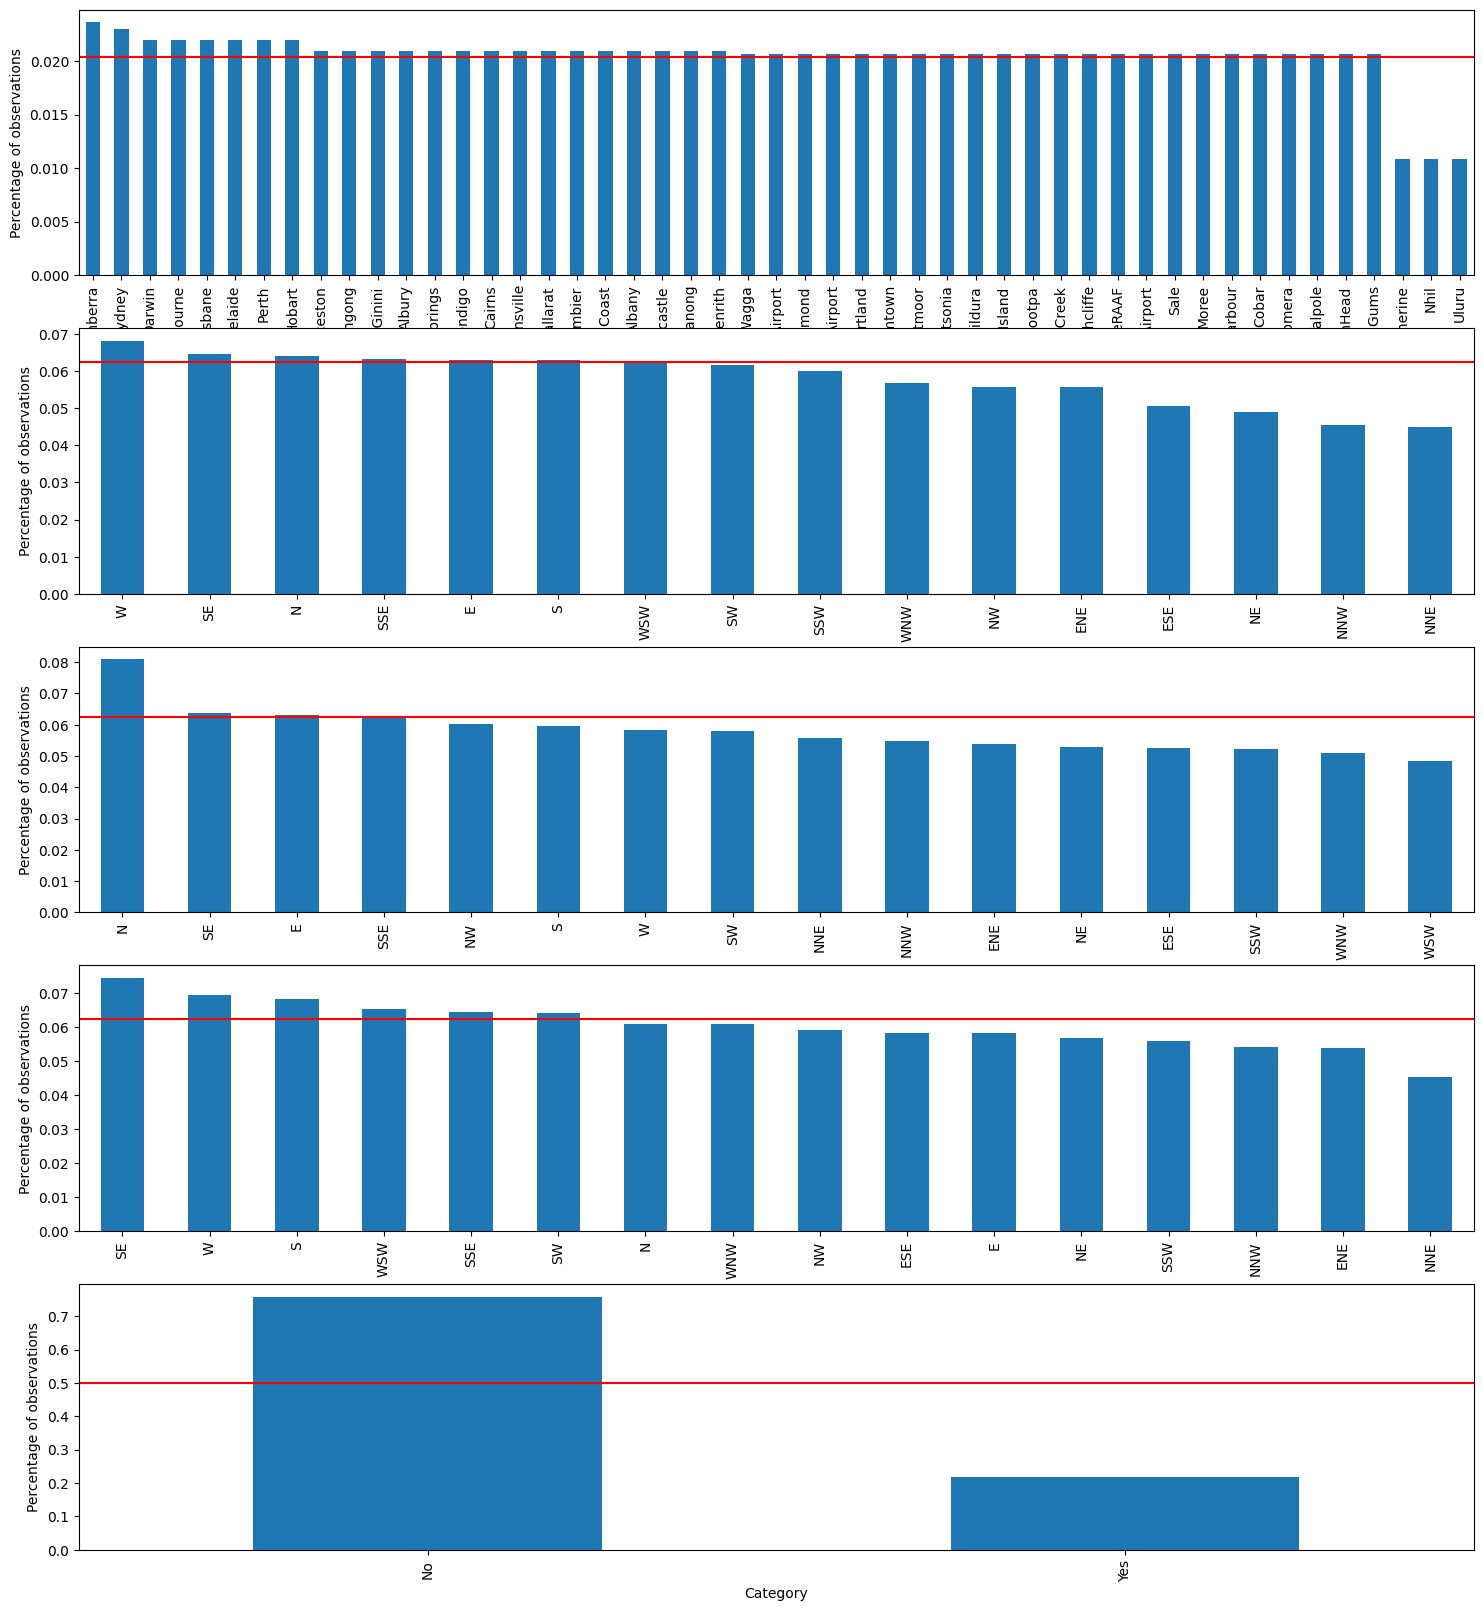

In [20]:
rows = len(australian_weather_data)

fig,axes = plt.subplots(len(cat_features),1,figsize=(18,len(cat_features)*4))
for i,col in enumerate(cat_features):
    frequencies = pd.Series(australian_weather_data[col].value_counts() / rows)
    frequencies.sort_values(ascending=False).plot.bar(ax=axes[i])
    axes[i].set_xlabel(col)
    hline = 1/ (australian_weather_data[col].nunique())
    axes[i].axhline(y=hline, color='red')
    axes[i].set_ylabel('Percentage of observations')
    axes[i].set_xlabel('Category')
plt.show()

Vemos que los datos están bastante balanceados. Tanto las features de ubicación geográfica como de dirección del viento presentan una distribución muy parecida a una uniforme.

**Analicemos las variables compuestas**

In [1]:
australian_weather_data.Date.nunique()

NameError: name 'australian_weather_data' is not defined

In [22]:
australian_weather_data.groupby(['Date'])['Date'].count()

Date
2007-11-01     1
2007-11-02     1
2007-11-03     1
2007-11-04     1
2007-11-05     1
              ..
2017-06-21    49
2017-06-22    49
2017-06-23    49
2017-06-24    49
2017-06-25    48
Name: Date, Length: 3436, dtype: int64

Tenemos más de 3000 valores distintos para la variable compuesta fecha/hora. Considermos transformar esta variable **mapeándola con la estación del año correspondiente (Otoño, Invierno, Primavera, Verano)**. De esta manera, la convertimos en una variable categórica y podemos utilizarla, previa codificación, como feature de nuestro modelo.

**Analicemos el (des)balance de la variable target**

In [23]:
australian_weather_data.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

In [2]:
australian_weather_data.RainTomorrow.nunique()

NameError: name 'australian_weather_data' is not defined

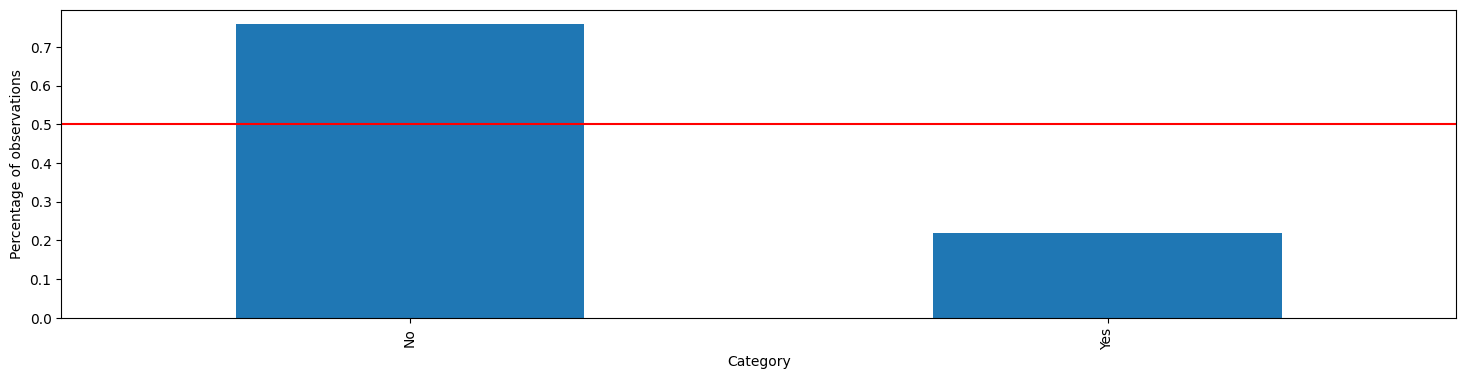

In [27]:
rows = len(australian_weather_data)
fig,axes = plt.subplots(1,1,figsize=(18,4))
frequencies = pd.Series(australian_weather_data[col].value_counts() / rows)
frequencies.sort_values(ascending=False).plot.bar(ax=axes)
axes.set_xlabel('RainTomorrow')
hline = 1/ (australian_weather_data['RainTomorrow'].nunique())
axes.axhline(y=hline, color='red')
axes.set_ylabel('Percentage of observations')
axes.set_xlabel('Category')
plt.show()

Consideramos a la variable target como balanceada. Si bien los casos _RainTomorrow = 'No'_ representan aproximadamente el 70% del total, no estamos ante diferentes órdenes de magnitud. <br>
Para codificarla, como tiene únicamente dos valores posibles ('Yes','No') es sencillo, basta con mapear:

**Yes = 1** <br>
**No = 0**

## 3. Limpieza y preparación de datos / ingeniería de features

- Datos faltantes. Indicar cantidad de observaciones y valores faltantes para cada variable.
- ¿Qué supuestos puede realizar acerca de los datos faltantes? ¿Qué técnicas de imputación recomendaría? Ensayar distintas técnicas y analizar los resultados.
- En función del estudio inicial de las variables que se hizo en la sección anterior, elegir una técnica de codificación para cada variable. Cuando lo considere apropiado, ensayar distintas técnicas y comparar los resultados, teniendo en cuenta el tipo de clasificador a utilizar. Nota: para tipos de datos compuestos o estructurados, considerar la obtención de variables de tipo numérico/categórico. 
- ¿Qué puede decir acerca de las relaciones entre las variables de entrada? 
- Antes de entrenar un modelo de aprendizaje automático, ¿Podría identificar las variables de entrada de mayor importancia? Considerar por lo menos dos técnicas para cada variable. Explique brevemente los métodos utilizados.

**Veamos los datos faltantes**

In [28]:
australian_weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

**Analicemos la relación entre las variables numéricas de entrada**

Vamos a analizar la correlacion entre las variables de entrada y elminar aquellas que sean redundantes o dependientes de otras.

Comenzamos analizando la relación entre las variables numéricas. Para eso vamos a utilizar la matriz de correlación utilizando el coeficiente de Spearman, que a diferencia del de Pearson no requiere que las variables tengan una distribución normal.

In [46]:
cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
auw_data_subset = pd.DataFrame(australian_weather_data,columns=cols)
corr_matrix = auw_data_subset.corr(method='spearman')

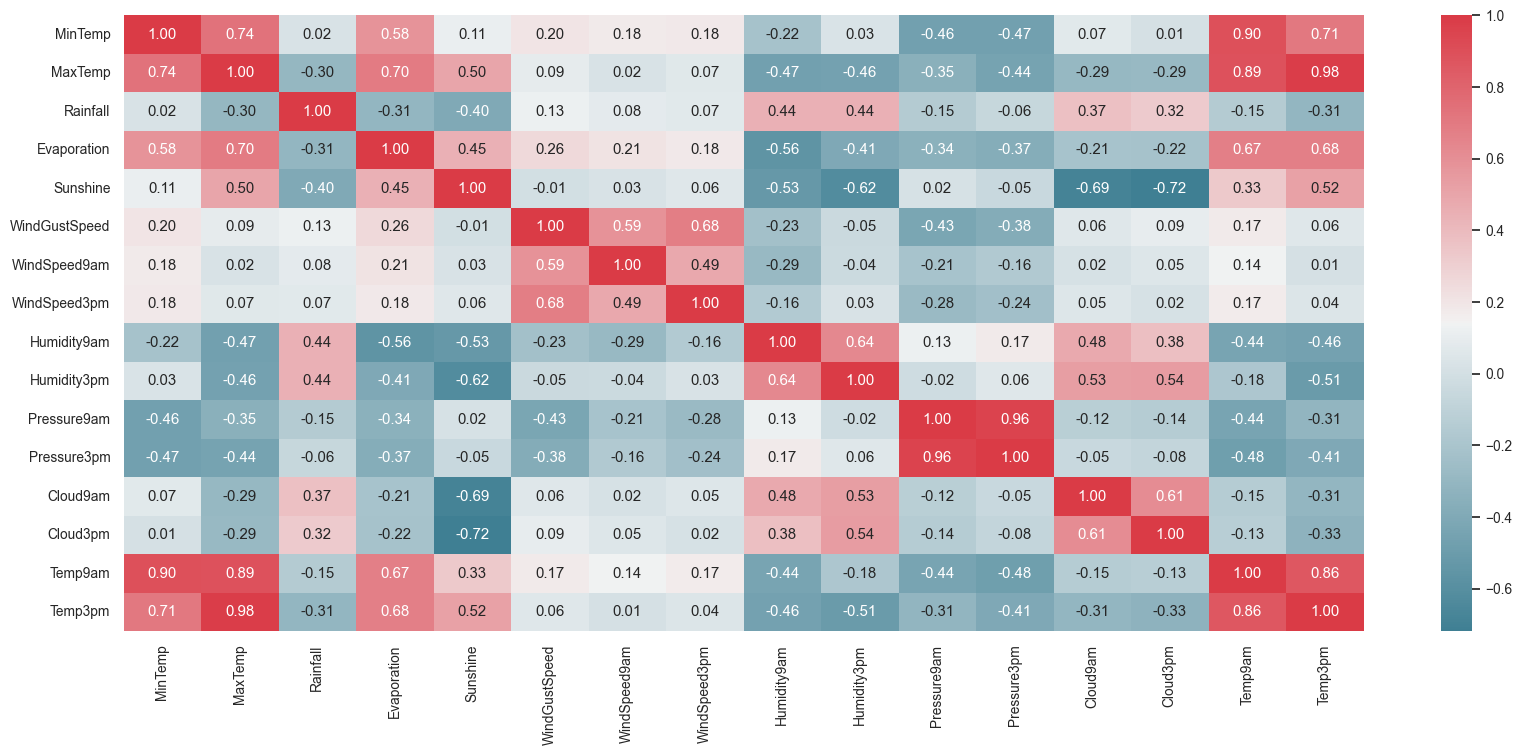

In [47]:
fig,axes = plt.subplots(1,1,figsize=(20,8))
sns.heatmap(corr_matrix,cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes)
sns.set(font_scale=0.9)

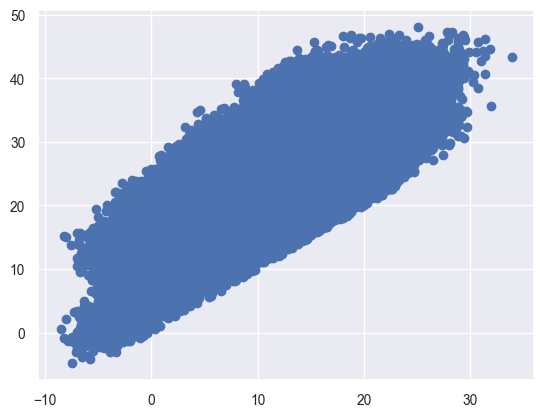

In [34]:
plt.scatter(auw_data_features_analysis.MinTemp, auw_data_features_analysis.MaxTemp)

**Analicemos la relación entre las variables numéricas de entrada y la variable categórica de salida**

Para eso utilizaremos el coeficiente de Kendall

In [49]:
cols = ['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm',
            'Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm', 
            'RainTomorrow']
auw_data_subset = pd.DataFrame(australian_weather_data,columns=cols)
auw_data_kendall = auw_data_subset.replace({'RainTomorrow': {'No': 0, 'Yes': 1} })
corr_matrix = auw_data_kendall.corr(method='kendall')

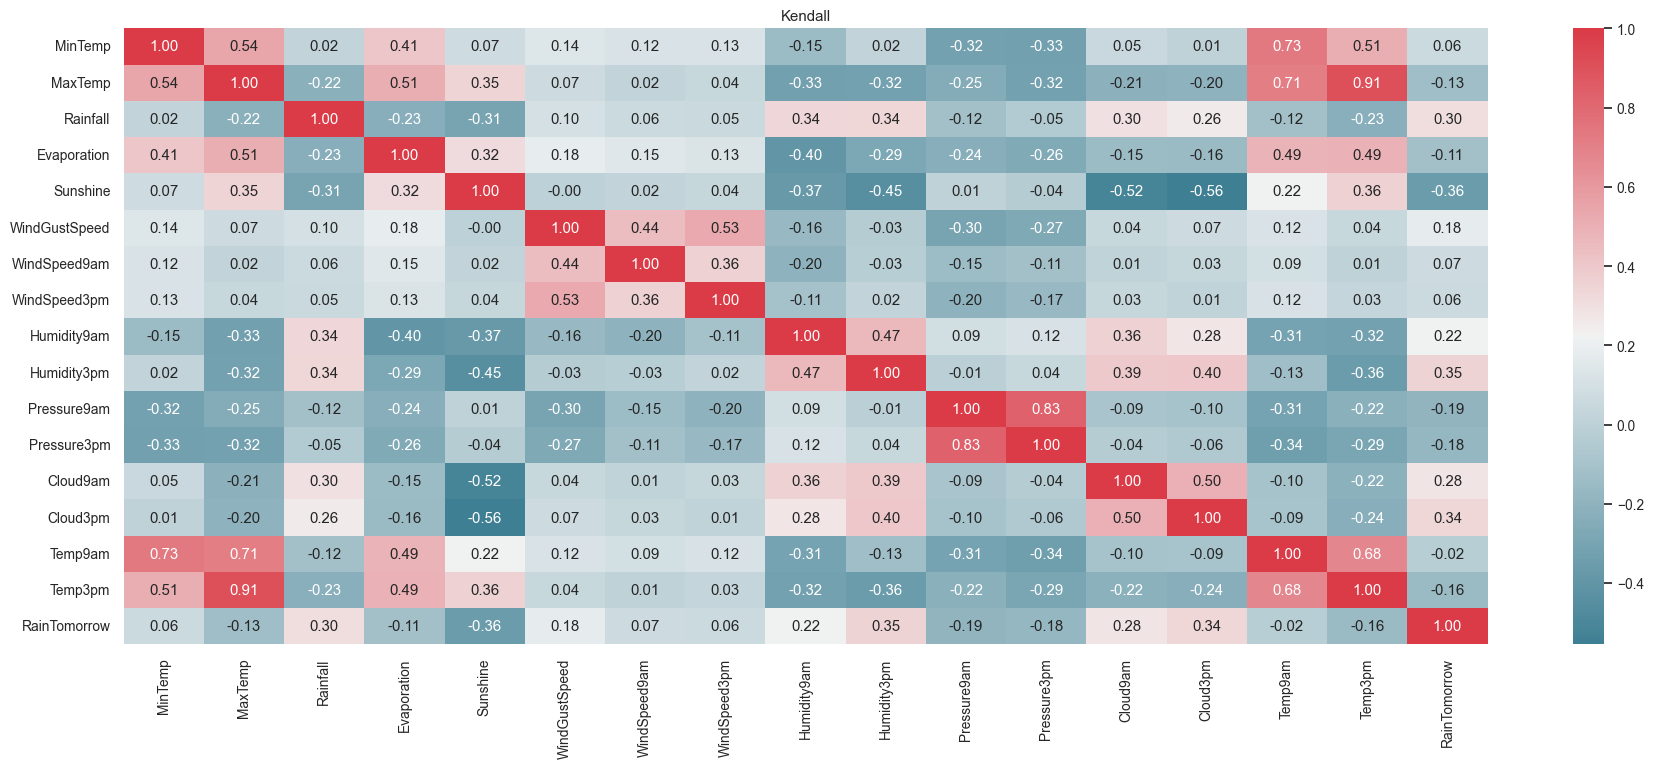

In [50]:
fig, axes = plt.subplots(1,1,figsize=(22,8))
axes.set_title("Kendall")
sns.heatmap(corr_matrix, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f", ax=axes)
sns.set(font_scale=0.9)

Nos interesa ver particularmente la última fila de la matriz: <br>
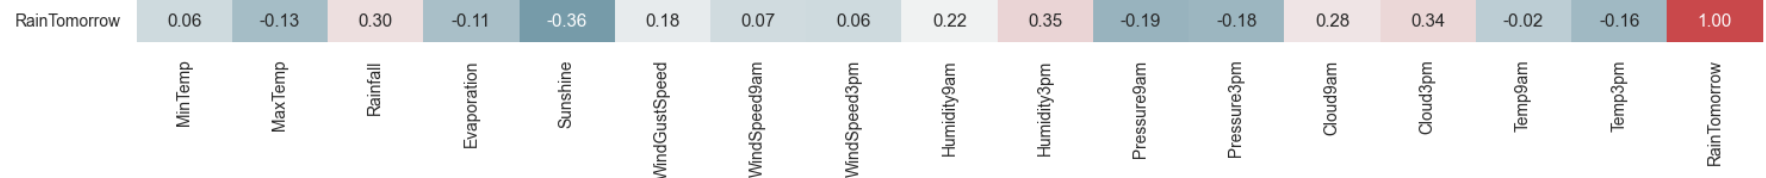

**Analicemos la relación entre las variables categóricas y la variable de salida**

Primero, las codificamos

In [53]:
cols = ['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
auw_data_subset = pd.DataFrame(australian_weather_data,columns=cols)
auw_data_subset

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,Albury,W,W,WNW,No,No
1,Albury,WNW,NNW,WSW,No,No
2,Albury,WSW,W,WSW,No,No
3,Albury,NE,SE,E,No,No
4,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...
145455,Uluru,E,SE,ENE,No,No
145456,Uluru,NNW,SE,N,No,No
145457,Uluru,N,SE,WNW,No,No
145458,Uluru,SE,SSE,N,No,No


In [67]:
auw_data_categories_encoded = pd.get_dummies(auw_data_subset)
auw_data_categories_encoded = auw_data_categories_encoded.rename(columns={"RainToday_Yes": "RainToday", "RainTomorrow_Yes": "RainTomorrow"})
auw_data_categories_encoded = auw_data_categories_encoded.drop(columns=['RainToday_No','RainTomorrow_No'])

In [69]:
auw_data_categories_encoded_x, auw_data_categories_encoded_y = \
auw_data_categories_encoded[auw_data_categories_encoded.columns[:-1]], \
auw_data_categories_encoded[auw_data_categories_encoded.columns[-1]]

In [75]:
X_train, X_test, y_train, y_test = train_test_split(auw_data_categories_encoded_x, auw_data_categories_encoded_y, test_size=0.2, random_state=1)

Train: (116368, 98) (116368,)
Test: (29092, 98) (29092,)


Luego de codificar las variables, vamos a probar dos métodos: el X<sup>2</sup> y el Criterio de Información Mutua

Comenzamos con **X<sup>2</sup>**

In [80]:
def select_features_chi2(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=chi2, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

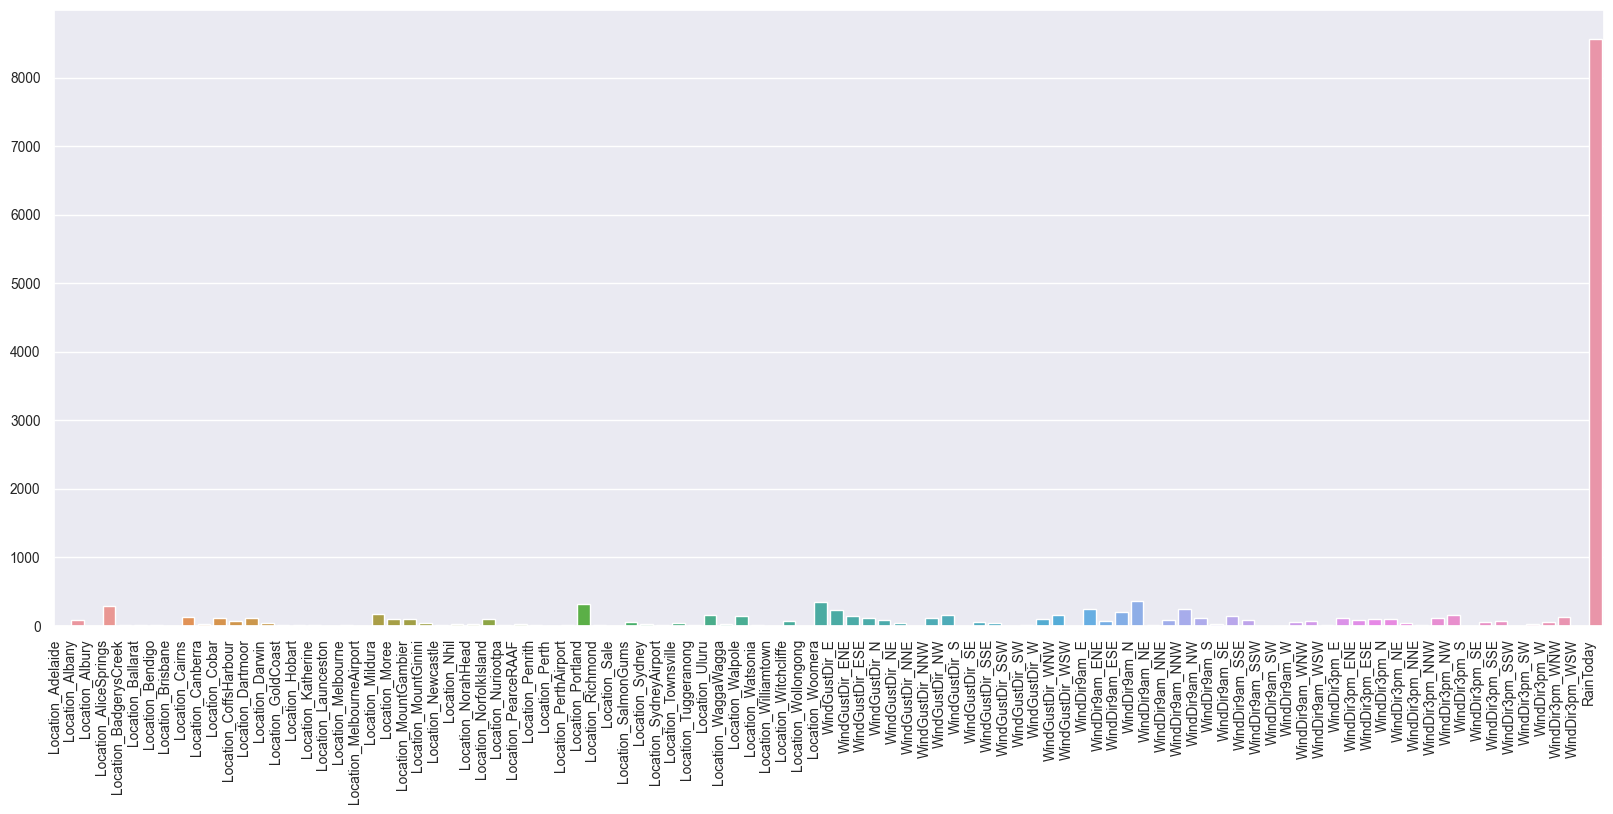

In [81]:
X_train_fs, X_test_fs, fs = select_features_chi2(X_train, y_train, X_test)
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in auw_data_categories_encoded.columns[:-1] ], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Continuamos con el **Criterio de Información Mutua**

In [82]:
def select_features_mutual_info(X_train, y_train, X_test,k= 'all'):  
  fs = SelectKBest(score_func=mutual_info_classif, k=k )  
  fs.fit(X_train, y_train)  
  X_train_fs = fs.transform(X_train)  
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

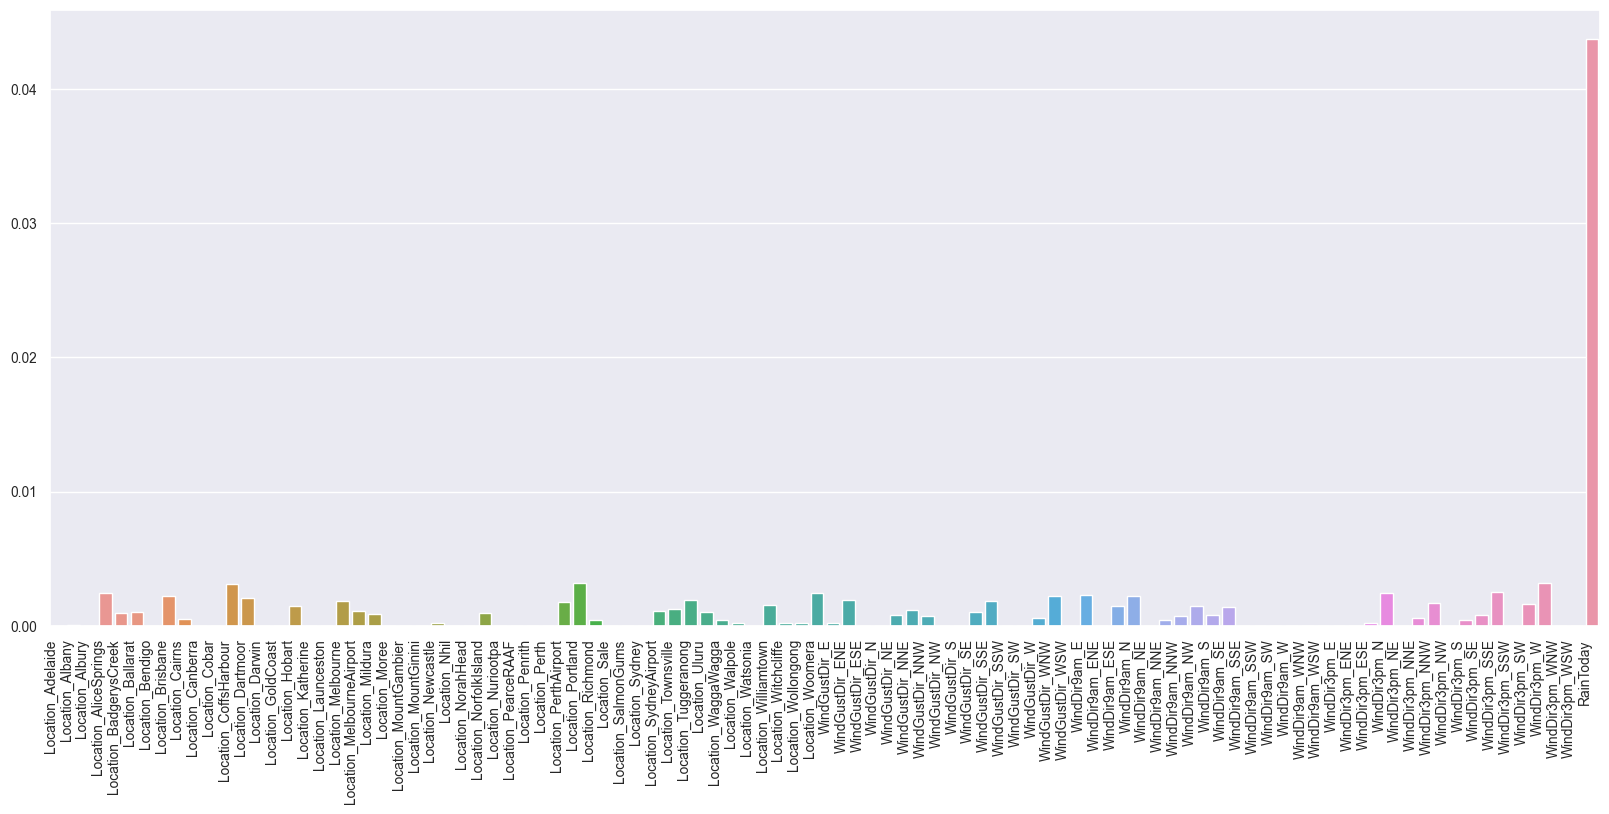

In [83]:
X_train_fs, X_test_fs, fs = select_features_mutual_info(X_train, y_train, X_test)
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in auw_data_categories_encoded.columns[:-1] ], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Podemos concluir que las categorías son muy poco representativas, salvo **RainToday**, que está fuertemente correlacionada, como era de esperarse, con **RainTomorrow**

**Analicemos la relación entre la variable compuesta Date y la variable de salida** <br>
Para esto, vamos a probar sustituyendo la fecha por el mes del año.

In [106]:
australian_weather_data['Date_Month'] = australian_weather_data.Date.str.slice(start=5,stop=7)

In [113]:
cols = ['Date_Month','RainTomorrow']
auw_data_date_month_encoded = pd.DataFrame(australian_weather_data, columns=cols)
auw_data_date_month_encoded = pd.get_dummies(auw_data_date_month_encoded)
auw_data_date_month_encoded = auw_data_date_month_encoded.rename(columns={"RainTomorrow_Yes": "RainTomorrow"})
auw_data_date_month_encoded = auw_data_date_month_encoded.drop(columns='RainTomorrow_No')

In [115]:
auw_data_date_month_encoded_x, auw_data_date_month_encoded_y = \
auw_data_date_month_encoded[auw_data_date_month_encoded.columns[:-1]], \
auw_data_date_month_encoded[auw_data_date_month_encoded.columns[-1]]

In [116]:
X_train, X_test, y_train, y_test = train_test_split(auw_data_date_month_encoded_x, auw_data_date_month_encoded_y, test_size=0.2, random_state=1)

Aplico **CIM**

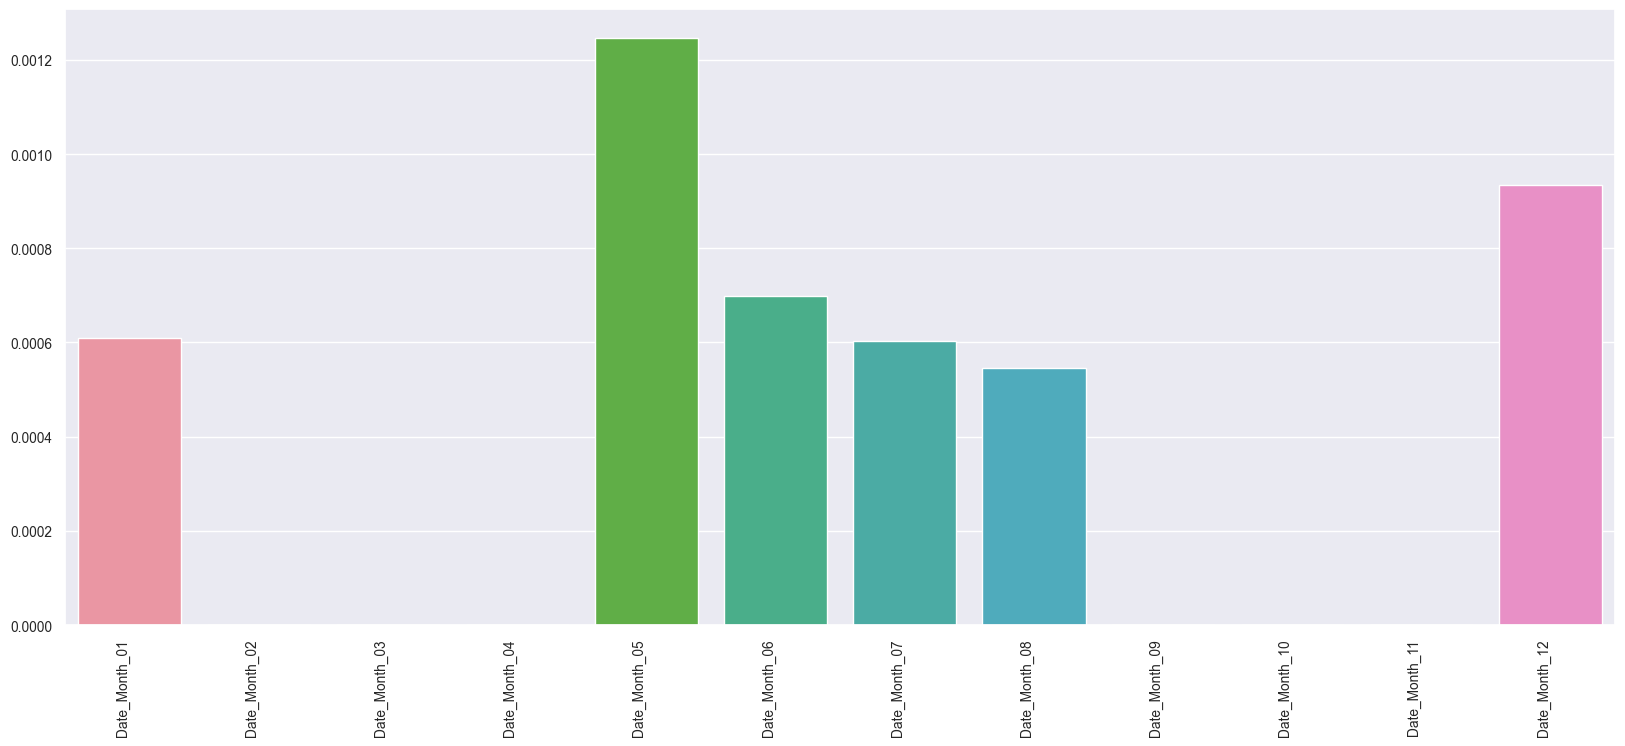

In [117]:
X_train_fs, X_test_fs, fs = select_features_mutual_info(X_train, y_train, X_test)
fig,axes = plt.subplots(1,1,figsize=(20,8))
bar = sns.barplot( x = [c for c in auw_data_date_month_encoded.columns[:-1] ], y = fs.scores_,ax=axes)
bar.set_xticklabels(bar.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

Luego de analizar las distintas features y su relación con la variable de target, decidimos:
- Eliminar las variables categóricas **['Location','WindGustDir','WindDir9am','WindDir3pm']**, dejando únicamente **RainToday**.
- Sustituir la variable **Date** por la variable **Date_Month**, y eliminar las observaciones de la medición de temperatura correspondientes a los meses que **no** son **[01,05,06,07,08,12]**.
- Eliminamos algunas variables numéricas, y nos quedamos con **['Rainfall','Sunshine','Humidity9am','Humidity3pm','Pressure9am','Cloud3pm']**